In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import jedi
%matplotlib inline

In [23]:
def read_temper(n=4, location="."):
    all_lipid_list = []
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run = i)
        lipid.columns = lipid.columns.str.strip()
        lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)

    all_dis_list = []
    for i in range(n):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run = i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(n):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)

    file = "../log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")
    temper["Run"] = temper["Run"].str[1:].astype(int)
    temper["Temp"] = "T" + temper["Temp"].astype(str) 
    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t4 = t4.assign(TotalE = t4.Energy + t4.Lipid)
    return t4

In [24]:
n= 12
location = "/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp/simulation/dis_30.0/0/"
data= read_temper(location=location, n=n)

In [27]:
# folder_list = [
#    '/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp/'
# ]
folder_list = [
   '/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp_topology/'
]
dis_list = np.linspace(30, 130, 51)
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
for folder in folder_list:
    for dis in dis_list:
        location = folder + "/simulation/dis_{}/0/".format(dis)
        data = read_temper(location=location, n=12)
        temps = list(dic.keys())
        for temp in temps:
            tmp = data.query('Temp=="{}"& Step > 1e7 & Step <= 2.6e7'.format(temp))
            tmp.to_csv(location+"t{}.dat".format(dic[temp]), sep=' ', index=False, header=False)
            

In [28]:
folder_list = [
   '/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp/'
]
# folder_list = [
#    '/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp_topology/'
# ]
dis_list = np.linspace(30, 130, 51)
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
for folder in folder_list:
    for dis in dis_list:
        location = folder + "/simulation/dis_{}/0/".format(dis)
        data = read_temper(location=location, n=12)
        temps = list(dic.keys())
        for temp in temps:
            tmp = data.query('Temp=="{}"& Step > 1e7 & Step <= 2.6e7'.format(temp))
            tmp.to_csv(location+"t{}.dat".format(dic[temp]), sep=' ', index=False, header=False)

In [ ]:
folder_list = [
   '/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp/'
]
# folder_list = [
#    '/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp_topology/'
# ]
dis_list = np.linspace(30, 130, 51)
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
for folder in folder_list:
    for dis in dis_list:
        location = folder + "/simulation/dis_{}/0/".format(dis)
        data = read_temper(location=location, n=12)
        temps = list(dic.keys())
        for temp in temps:
            tmp = data.query('Temp=="{}"& Step > 1e7 & Step <= 2.6e7'.format(temp))
            tmp.to_csv(location+"t{}.dat".format(dic[temp]), sep=' ', index=False, header=False)

In [30]:
def read_temper2(n=4, location="."):
    all_lipid_list = []
    for i in range(n):
        file = "lipid.{}.dat".format(i)
        lipid = pd.read_csv(location+file).assign(Run = i)
        lipid.columns = lipid.columns.str.strip()
        lipid = lipid[["Steps","Lipid","Run"]]
        all_lipid_list.append(lipid)
    lipid = pd.concat(all_lipid_list)

    all_dis_list = []
    for i in range(n):
        file = "addforce.{}.dat".format(i)
        dis = pd.read_csv(location+file).assign(Run = i)
        dis.columns = dis.columns.str.strip()
        remove_columns = ['AddedForce', 'Dis12', 'Dis34', 'Dis56']
        dis.drop(remove_columns, axis=1,inplace=True)
        all_dis_list.append(dis)
    dis = pd.concat(all_dis_list)

    all_wham_list = []
    for i in range(n):
        file = "wham.{}.dat".format(i)
        wham = pd.read_csv(location+file).assign(Run = i)
        wham.columns = wham.columns.str.strip()
        remove_columns = ['Rg', 'Tc']
        wham = wham.drop(remove_columns, axis=1)
        all_wham_list.append(wham)
    wham = pd.concat(all_wham_list)

    file = "../log.lammps"
    temper = pd.read_table(location+file, skiprows=2, sep=' ')
    temper = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Run", var_name="Temp")
#     temper["Run"] = temper["Run"].str[1:].astype(int)
#     temper["Temp"] = "T" + temper["Temp"].astype(str) 
    t2 = temper.merge(wham, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t3 = t2.merge(dis, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                     ).sort_values('Step').drop('Steps', axis=1)
    t4 = t3.merge(lipid, how='inner', left_on=["Step", "Run"], right_on=["Steps", "Run"]
                             ).sort_values('Step').drop('Steps', axis=1)
    t4 = t4.assign(TotalE = t4.Energy + t4.Lipid)
    return t4

In [31]:
dis_list = ["test"]
dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
for folder in folder_list:
    for dis in dis_list:
        location = folder + "/simulation/{}/0/".format(dis)
        data = read_temper2(location=location, n=12)
        temps = list(dic.keys())
        for temp in temps:
            tmp = data.query('Temp=="{}"& Step > 1e7 & Step <= 2.6e7'.format(temp))
            tmp.to_csv(location+"t{}.dat".format(dic[temp]), sep=' ', index=False, header=False)

In [25]:
n= 12
location = "/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp/simulation/dis_80.0/0/"
data= read_temper(location=location, n=n)

In [32]:
file = "../log.lammps"
location = "/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp/simulation/dis_80.0/0/"
temper = pd.read_table(location+file, skiprows=2, sep=' ')
temper2 = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Temp", var_name="Run")



In [37]:
temper.tail()

,Step,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11
7282,29128000,10,8,5,1,9,3,7,6,11,4,0,2
7283,29132000,10,8,5,1,9,3,7,6,11,4,0,2
7284,29136000,10,8,5,1,9,3,7,6,11,4,0,2
7285,29140000,10,8,5,1,9,3,7,6,11,4,0,2
7286,29144000,10,8,5,1,9,3,7,6,11,4,0,2


In [38]:
temper2.tail()

,Step,Run,Temp
87439,29128000,T11,2
87440,29132000,T11,2
87441,29136000,T11,2
87442,29140000,T11,2
87443,29144000,T11,2


In [39]:
file = "../log.lammps"
location = "/Users/weilu/Research/server/oct_2017/week_oct09_two/more_higher_temp/simulation/dis_80.0/0/"
temper = pd.read_table(location+file, skiprows=2, sep=' ')
temper3 = temper.melt(id_vars=['Step'], value_vars=['T' + str(i) for i in range(n)], value_name="Run", var_name="Temp")



In [40]:
temper3.tail()

,Step,Temp,Run
87439,29128000,T11,2
87440,29132000,T11,2
87441,29136000,T11,2
87442,29140000,T11,2
87443,29144000,T11,2


In [ ]:

for i in range(12):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    tmp = data.query('Run=={}'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
    tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'myT', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

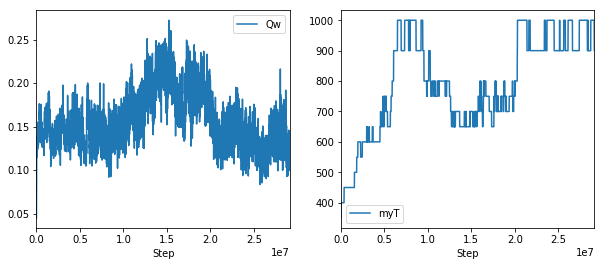

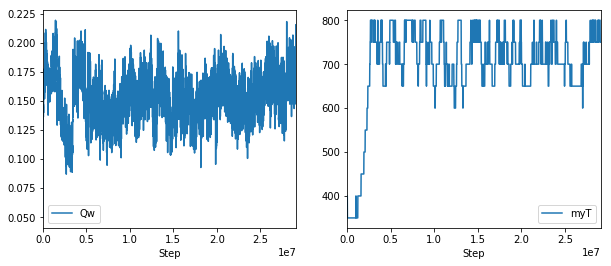

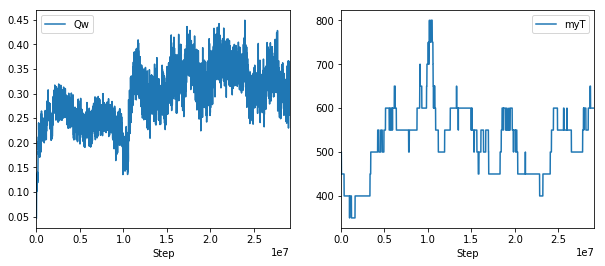

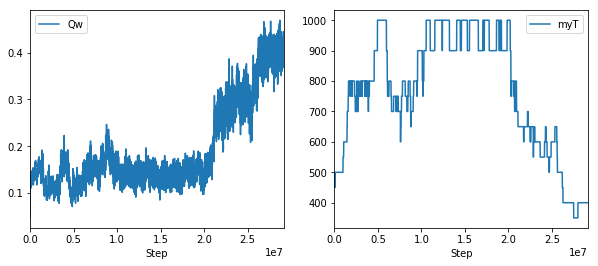

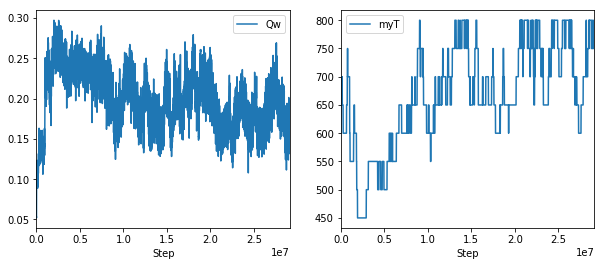

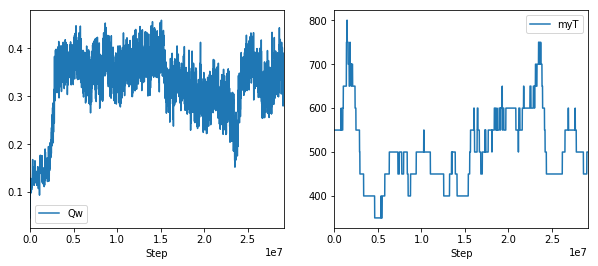

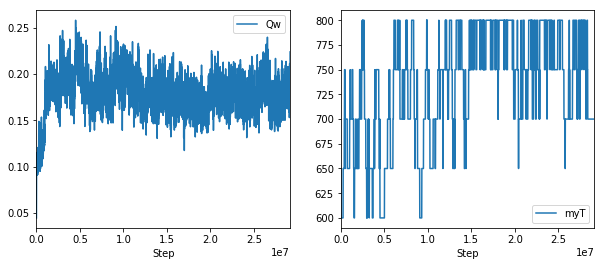

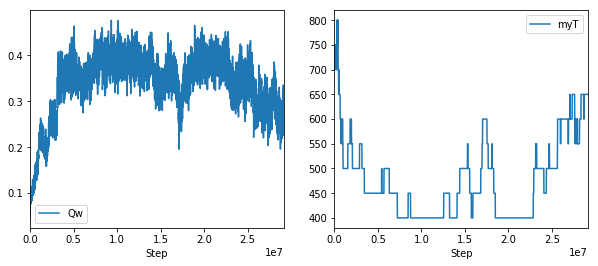

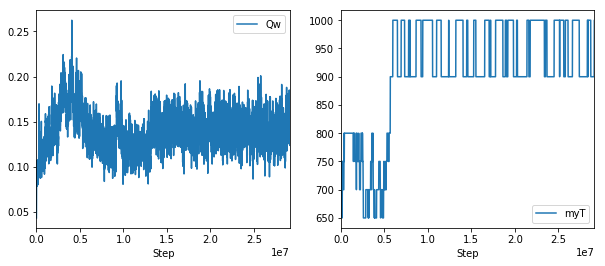

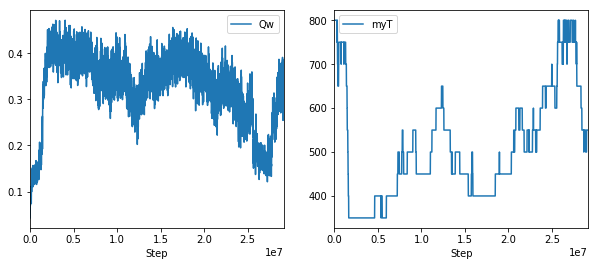

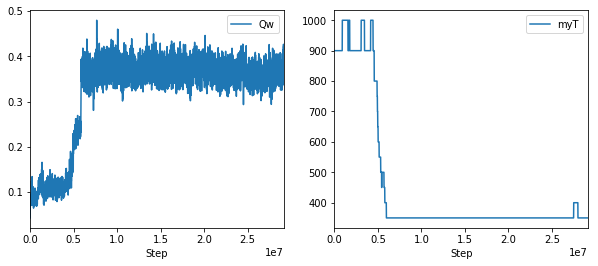

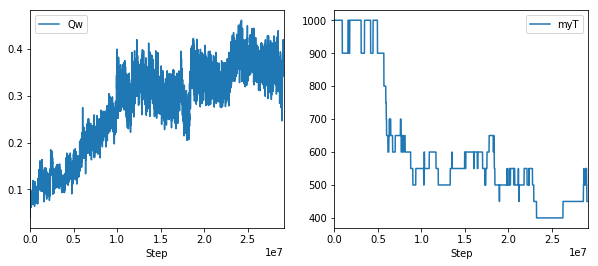

In [26]:

for i in range(12):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    tmp = data.query('Run=={}'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
    tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'myT', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

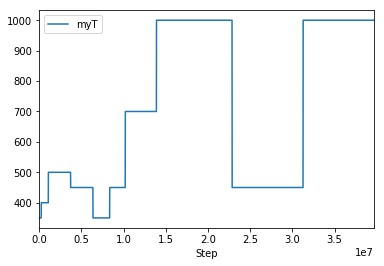

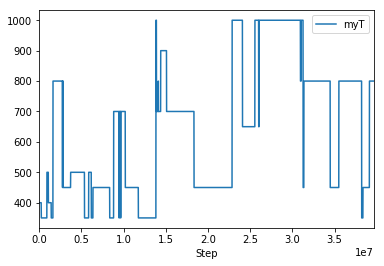

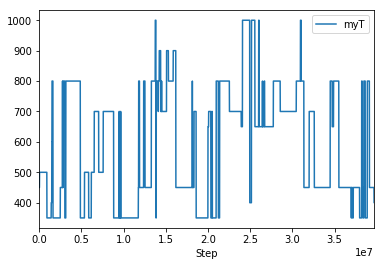

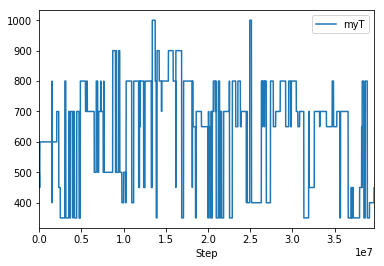

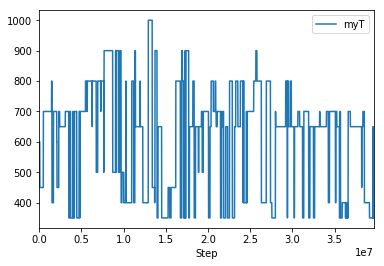

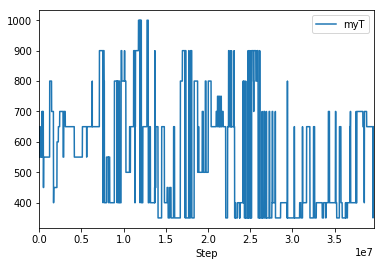

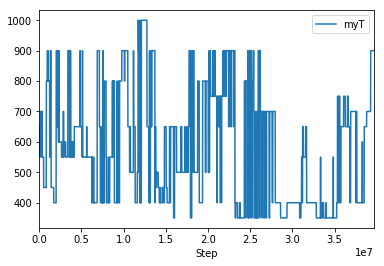

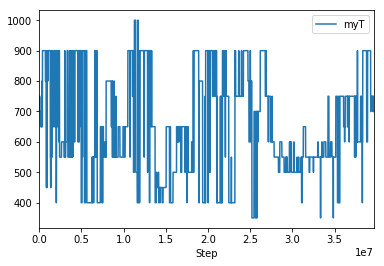

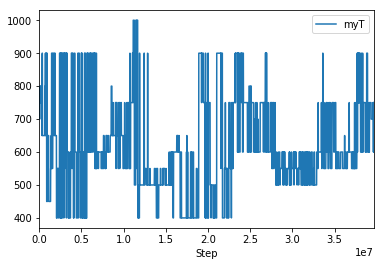

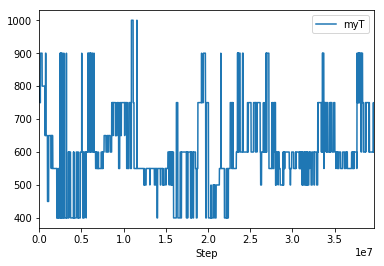

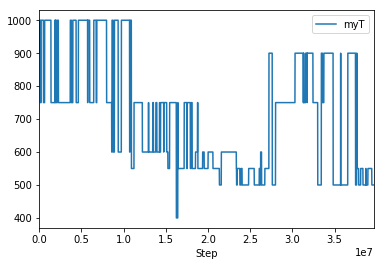

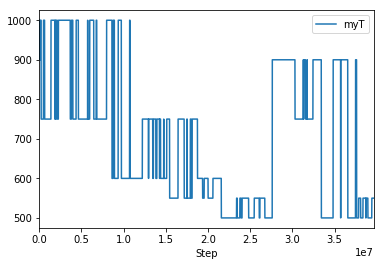

In [10]:
for i in range(12):
    tmp = data.query('Run=={}'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
    tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'myT')

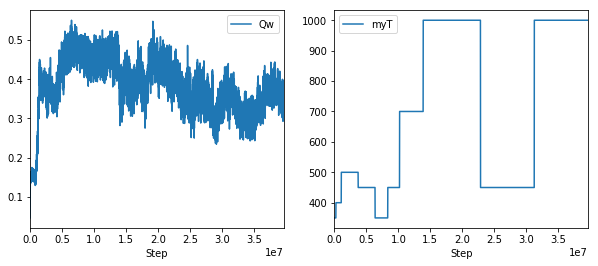

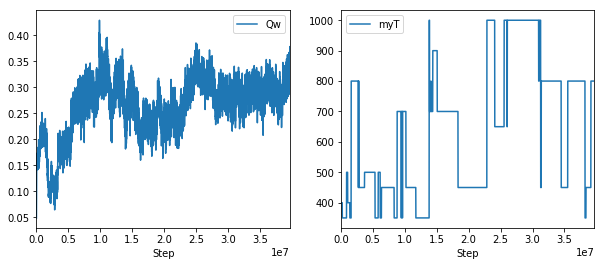

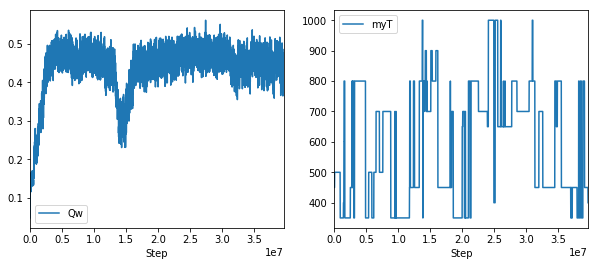

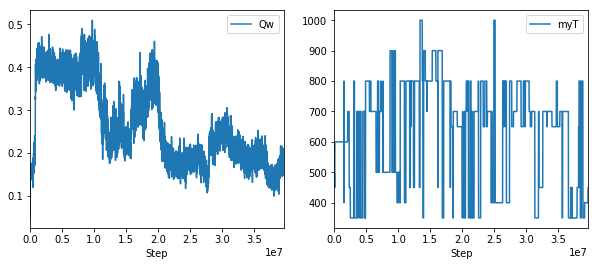

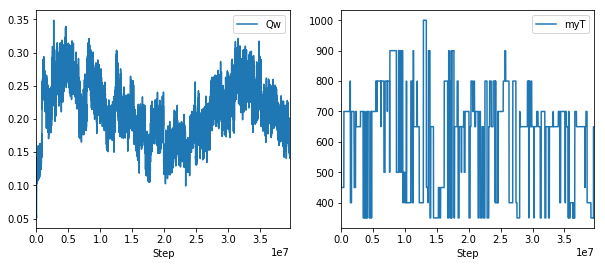

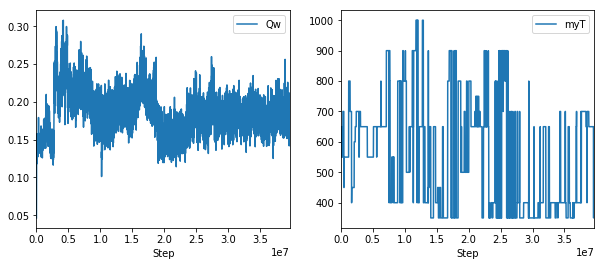

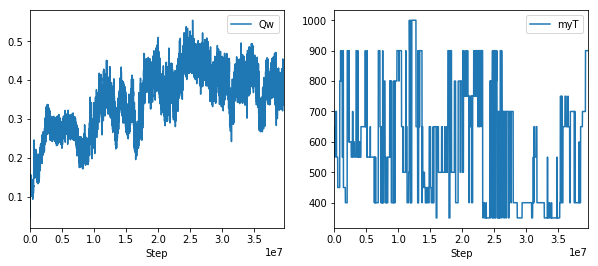

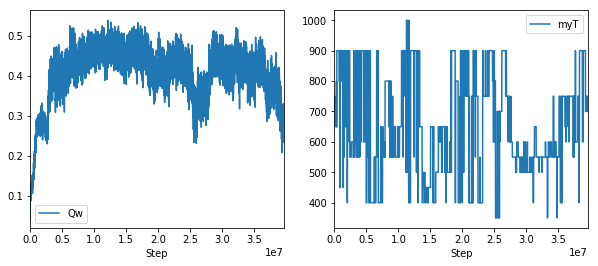

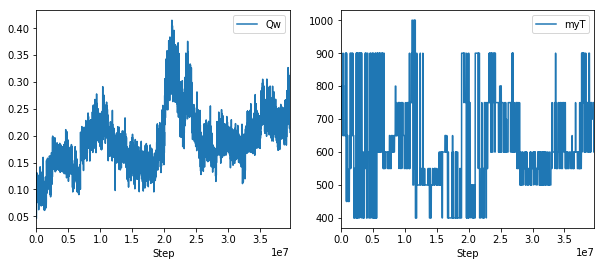

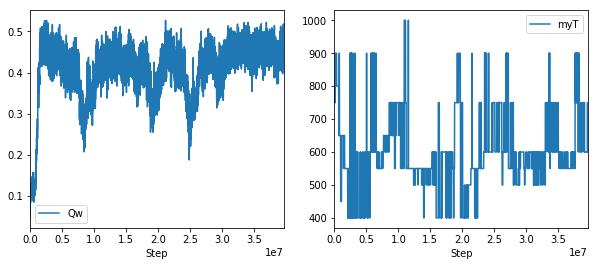

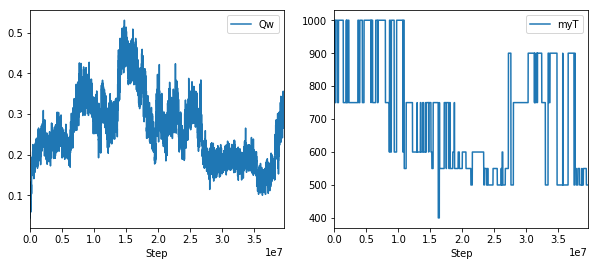

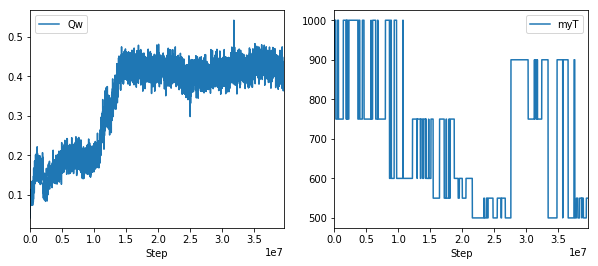

In [32]:

for i in range(12):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    tmp = data.query('Run=={}'.format(i))
    dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
    tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'myT', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

In [41]:
list(dic.keys())

['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11']

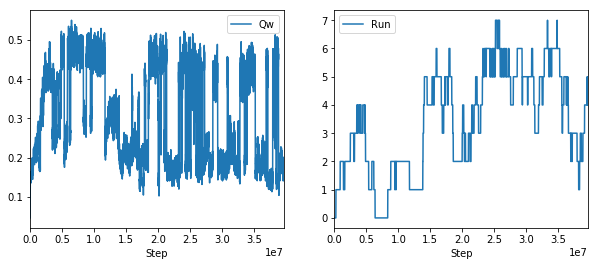

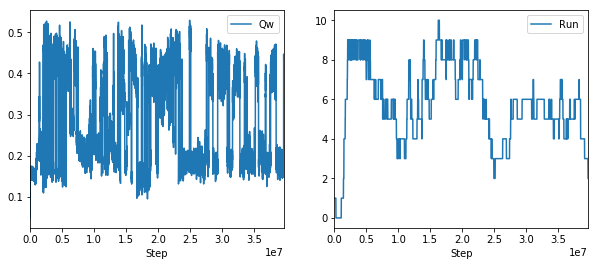

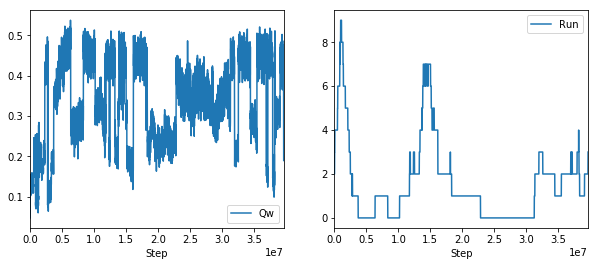

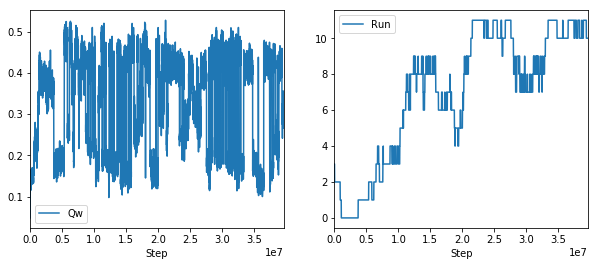

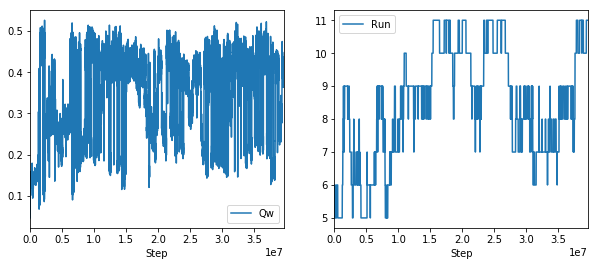

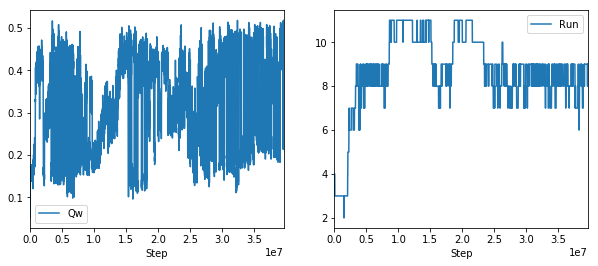

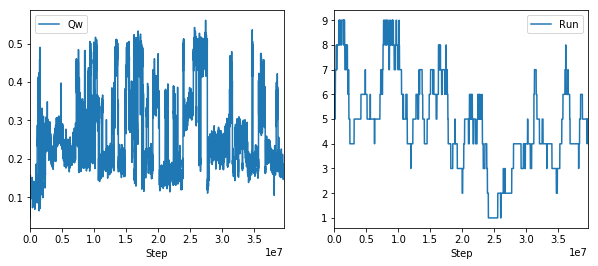

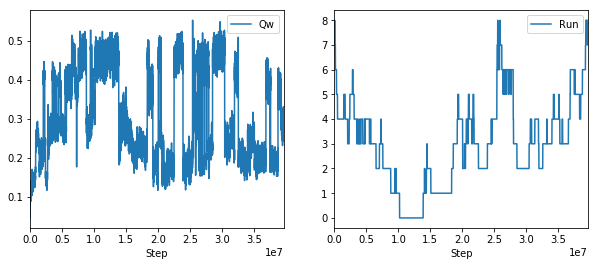

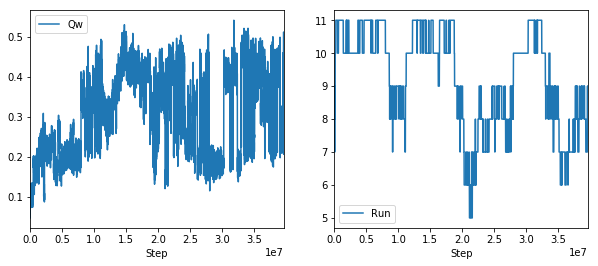

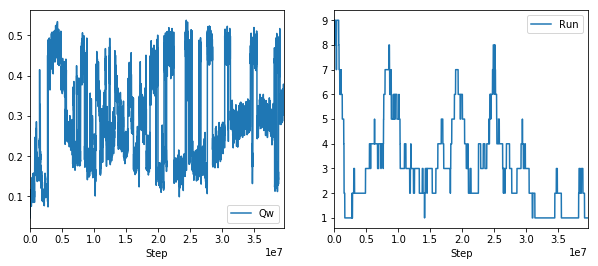

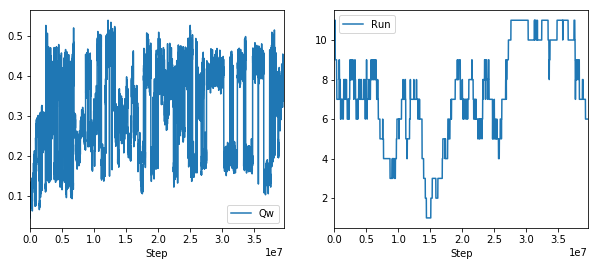

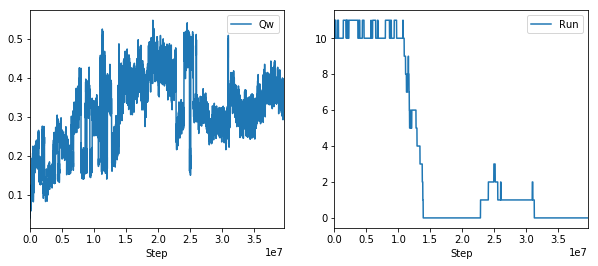

In [43]:
for i in list(dic.keys()):
    fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
    tmp = data.query('Temp=="{}"'.format(i))
#     dic = {"T0":350, "T1":400, "T2":450, "T3":500, "T4":550, "T5":600, "T6":650, "T7":700, "T8":750, "T9":800, "T10":900, "T11":1000}
#     tmp = tmp.assign(myT = tmp['Temp'].map(dic))
    tmp.plot('Step', 'Run', subplots=True, ax=axs[1])
    tmp.plot('Step', 'Qw', subplots=True, ax=axs[0])

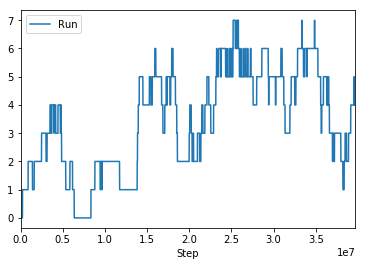

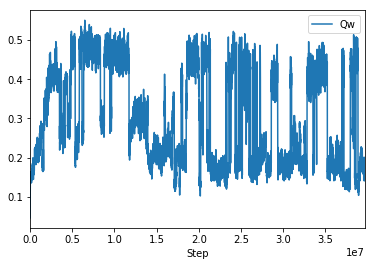

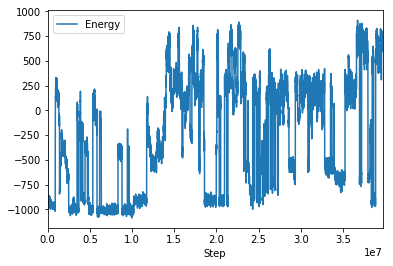

In [11]:
t350 = data.query('Temp=="T0" & Step > 0e7')
t350.plot('Step', 'Run')
t350.plot('Step', 'Qw')
t350.plot('Step', 'Energy')

In [55]:

test = {k_list=[1],
                  force_ramp_rate_list=[1],
                  memb_k_list=[1],
                  force_list=["ramp"],
                  rg_list=[0.08],
                  pressure_list=[0.1],
                  repeat=1,
                  mode_list=[2],
                  commons=0,
                  temperature_list=[300],
                  start_from_list=["native"],
                  simulation_model_list=["go"]}

SyntaxError: invalid syntax (<ipython-input-55-1875d7e4a094>, line 1)

In [60]:
test = {"k_list":[1], "force":[1]}

In [63]:
for key, value in test.items():
    print(key, value)

k_list [1]
force [1]


In [69]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [74]:
[list(range(10))]

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]